In [1]:
import time
from tensorflow_model.policy_gradient import train, test
from tensorflow_model.deep_network.model import FullyConnected
from biocells.biocells_model import BioCells
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
assert "results" in os.listdir()

In [3]:
os.listdir('results')

['random_init', 'corner_init']

# 1. Corner initialisation 
## (Less variance)

In [4]:
total_games = 10000

## 1.1 Batch Size

In [9]:
parameter_name = 'batch'

In [10]:
overall_avg_lifetime = []
overall_cost = []
overall_computational_time = []

parameter_range = [10, 50, 100, 500]

for batch in parameter_range:

    n_iter = total_games / batch
    grid_size = 10
    simulation = BioCells(random_corner_init=True)
    n_input = grid_size**2
    model = FullyConnected(n_input=n_input, n_hidden=200, n_classes=4)

    start_time = time.time()
    avg_lifetime, avg_reward, computation_time = train(model, simulation,
                                                       batch_size=batch,
                                                       n_iterations=int(n_iter),
                                                       gamma=0.7,
                                                       learning_rate=0.01,
                                                       grid_size=10,
                                                       tree_search=False,
                                                       ts_prop=0.5)

    end_time = time.time()

    overall_avg_lifetime.append(avg_lifetime)
    overall_cost.append(avg_reward)
    overall_computational_time.append(computation_time)

print('Done...')

Start training...
Creating FullyConnected model


Lifetime: 38.5: 100%|██████████| 1000/1000 [13:42<00:00,  1.22it/s]


Saving model to tensorflow_model/weights/weights_FullyConnected.p
Start training...
Creating FullyConnected model


Lifetime: 29.98: 100%|██████████| 200/200 [13:20<00:00,  4.00s/it]


Saving model to tensorflow_model/weights/weights_FullyConnected.p
Start training...
Creating FullyConnected model


Lifetime: 37.52: 100%|██████████| 100/100 [14:36<00:00,  8.77s/it]


Saving model to tensorflow_model/weights/weights_FullyConnected.p
Start training...
Creating FullyConnected model


Lifetime: 32.436: 100%|██████████| 20/20 [14:09<00:00, 42.49s/it]

Saving model to tensorflow_model/weights/weights_FullyConnected.p
Done...


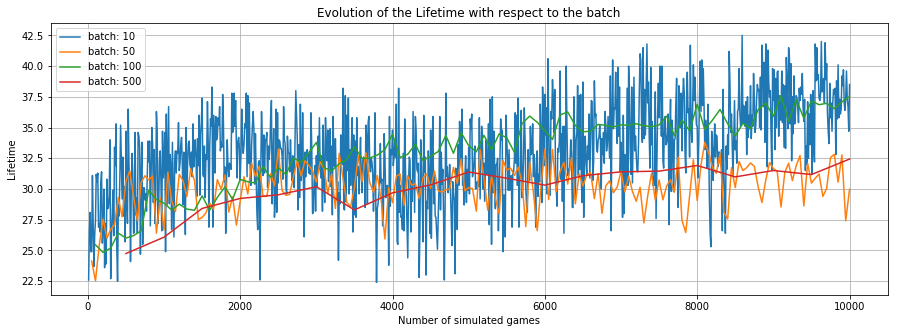

In [11]:
plt.figure(figsize=(15,5))
plt.title('Evolution of the Lifetime with respect to the {}'.format(parameter_name))
for index, batch in enumerate(parameter_range):
    batch_x = [(i+1)*batch for i in range(int(total_games/batch))]
    plt.plot(batch_x, overall_avg_lifetime[index], label=parameter_name + ': {}'.format(batch))
plt.ylabel('Lifetime')
plt.xlabel('Number of simulated games')
plt.grid()
plt.legend()
plt.savefig('results/corner_init/{}.png'.format(parameter_name))
plt.show()

## 1.2 Gamma

In [12]:
parameter_name = 'gamma'

In [13]:
overall_avg_lifetime = []
overall_cost = []
overall_computational_time = []

parameter_range = [0.2, 0.5, 0.7, 0.9]

batch_size = 128
n_iter = int(total_games/batch_size)

for parameter in parameter_range:
    
    grid_size = 10
    simulation = BioCells(random_corner_init=True)
    n_input = grid_size**2
    model = FullyConnected(n_input=n_input, n_hidden=200, n_classes=4)

    start_time = time.time()
    avg_lifetime, avg_reward, computation_time = train(model, simulation,
                                                       batch_size=batch_size,
                                                       n_iterations=int(n_iter),
                                                       gamma=parameter,
                                                       learning_rate=0.01,
                                                       grid_size=10,
                                                       tree_search=False,
                                                       ts_prop=0.5)

    end_time = time.time()

    overall_avg_lifetime.append(avg_lifetime)
    overall_cost.append(avg_reward)
    overall_computational_time.append(computation_time)

print('Done...')

Start training...
Creating FullyConnected model


Lifetime: 31.5546875: 100%|██████████| 78/78 [13:48<00:00, 10.62s/it]


Saving model to tensorflow_model/weights/weights_FullyConnected.p
Start training...
Creating FullyConnected model


Lifetime: 34.8828125: 100%|██████████| 78/78 [14:15<00:00, 10.97s/it]


Saving model to tensorflow_model/weights/weights_FullyConnected.p
Start training...
Creating FullyConnected model


Lifetime: 31.5390625: 100%|██████████| 78/78 [14:32<00:00, 11.18s/it]


Saving model to tensorflow_model/weights/weights_FullyConnected.p
Start training...
Creating FullyConnected model


Lifetime: 40.4140625: 100%|██████████| 78/78 [15:40<00:00, 12.06s/it]

Saving model to tensorflow_model/weights/weights_FullyConnected.p
Done...


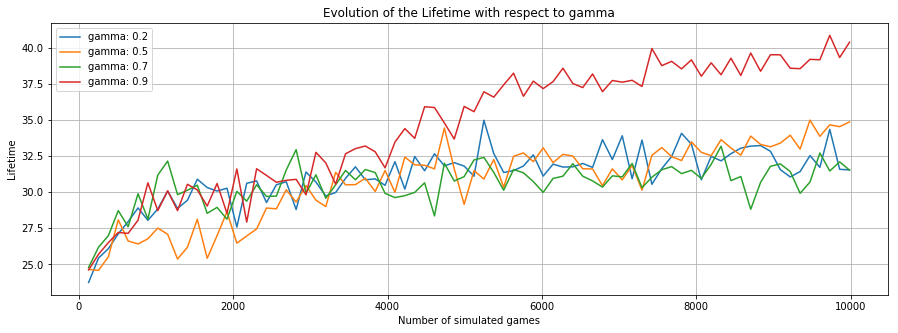

In [14]:
plt.figure(figsize=(15,5))
plt.title('Evolution of the Lifetime with respect to {}'.format(parameter_name))
for index, parameter in enumerate(parameter_range):
    x_values = [(i+1)*batch_size for i in range(int(total_games/batch_size))]
    plt.plot(x_values, overall_avg_lifetime[index], label=parameter_name + ': {}'.format(parameter))
plt.ylabel('Lifetime')
plt.xlabel('Number of simulated games')
plt.grid()
plt.legend()
plt.savefig('results/corner_init/{}.png'.format(parameter_name))
plt.show()

## 1.3 Learning rate

In [15]:
parameter_name = 'learning rate'

In [16]:
overall_avg_lifetime = []
overall_cost = []
overall_computational_time = []

parameter_range = [0.1, 0.01, 0.001]

batch_size = 128
n_iter = int(total_games/batch_size)

for parameter in parameter_range:
    
    grid_size = 10
    simulation = BioCells(random_corner_init=True)
    n_input = grid_size**2
    model = FullyConnected(n_input=n_input, n_hidden=200, n_classes=4)

    start_time = time.time()
    avg_lifetime, avg_reward, computation_time = train(model, simulation,
                                                       batch_size=batch_size,
                                                       n_iterations=int(n_iter),
                                                       gamma=0.8,
                                                       learning_rate=parameter,
                                                       grid_size=10,
                                                       tree_search=False,
                                                       ts_prop=0.5)

    end_time = time.time()

    overall_avg_lifetime.append(avg_lifetime)
    overall_cost.append(avg_reward)
    overall_computational_time.append(computation_time)

print('Done...')

Start training...
Creating FullyConnected model


Lifetime: 32.171875: 100%|██████████| 78/78 [14:38<00:00, 11.27s/it] 


Saving model to tensorflow_model/weights/weights_FullyConnected.p
Start training...
Creating FullyConnected model


Lifetime: 31.5859375: 100%|██████████| 78/78 [13:05<00:00, 10.07s/it]


Saving model to tensorflow_model/weights/weights_FullyConnected.p
Start training...
Creating FullyConnected model


Lifetime: 30.0625: 100%|██████████| 78/78 [10:39<00:00,  8.20s/it]   

Saving model to tensorflow_model/weights/weights_FullyConnected.p
Done...


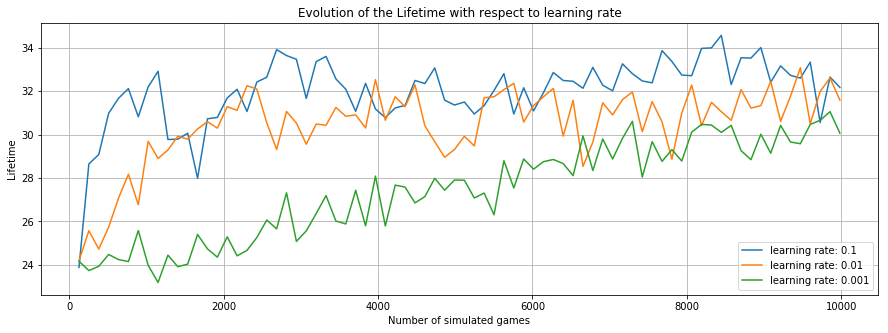

In [17]:
plt.figure(figsize=(15,5))
plt.title('Evolution of the Lifetime with respect to {}'.format(parameter_name))
for index, parameter in enumerate(parameter_range):
    x_values = [(i+1)*batch_size for i in range(int(total_games/batch_size))]
    plt.plot(x_values, overall_avg_lifetime[index], label=parameter_name + ': {}'.format(parameter))
plt.ylabel('Lifetime')
plt.xlabel('Number of simulated games')
plt.grid()
plt.legend()
plt.savefig('results/corner_init/{}.png'.format(parameter_name))
plt.show()

## 1.4 Grid size

In [18]:
parameter_name = 'grid size'

In [19]:
overall_avg_lifetime = []
overall_cost = []
overall_computational_time = []

parameter_range = [10, 20, 30]

batch_size = 128
n_iter = int(total_games/batch_size)

for parameter in parameter_range:
    
    grid_size = parameter
    simulation = BioCells(random_corner_init=True)
    n_input = grid_size**2
    model = FullyConnected(n_input=n_input, n_hidden=200, n_classes=4)

    start_time = time.time()
    avg_lifetime, avg_reward, computation_time = train(model, simulation,
                                                       batch_size=batch_size,
                                                       n_iterations=int(n_iter),
                                                       gamma=0.8,
                                                       learning_rate=parameter,
                                                       grid_size=grid_size,
                                                       tree_search=False,
                                                       ts_prop=0.5)

    end_time = time.time()

    overall_avg_lifetime.append(avg_lifetime)
    overall_cost.append(avg_reward)
    overall_computational_time.append(computation_time)

print('Done...')

Start training...
Creating FullyConnected model


Lifetime: 26.21875: 100%|██████████| 78/78 [09:32<00:00,  7.34s/it]  


Saving model to tensorflow_model/weights/weights_FullyConnected.p
Start training...
Creating FullyConnected model


Lifetime: 25.2109375: 100%|██████████| 78/78 [09:57<00:00,  7.66s/it]


Saving model to tensorflow_model/weights/weights_FullyConnected.p
Start training...
Creating FullyConnected model


Lifetime: 26.828125: 100%|██████████| 78/78 [10:39<00:00,  8.20s/it] 


Saving model to tensorflow_model/weights/weights_FullyConnected.p
Done...


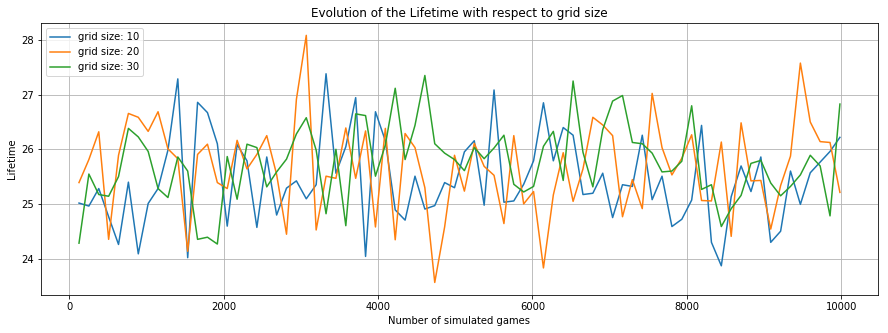

In [20]:
plt.figure(figsize=(15,5))
plt.title('Evolution of the Lifetime with respect to {}'.format(parameter_name))
for index, parameter in enumerate(parameter_range):
    x_values = [(i+1)*batch_size for i in range(int(total_games/batch_size))]
    plt.plot(x_values, overall_avg_lifetime[index], label=parameter_name + ': {}'.format(parameter))
plt.ylabel('Lifetime')
plt.xlabel('Number of simulated games')
plt.grid()
plt.legend()
plt.savefig('results/corner_init/{}.png'.format(parameter_name))
plt.show()

## 1.5 Tree Search

In [ ]:
parameter_name = 'Tree Search Single Simulation'

In [22]:
overall_avg_lifetime = []
overall_cost = []
overall_computational_time = []

parameter_range = [0, 0.2, 0.4, 0.6, 0.8]

batch_size = 128
n_iter = int(total_games/batch_size)

for parameter in parameter_range:
    
    grid_size = 10
    simulation = BioCells(random_corner_init=True)
    n_input = grid_size**2
    model = FullyConnected(n_input=n_input, n_hidden=200, n_classes=4)

    start_time = time.time()
    avg_lifetime, avg_reward, computation_time = train(model, simulation,
                                                       batch_size=batch_size,
                                                       n_iterations=int(n_iter),
                                                       gamma=0.8,
                                                       learning_rate=0.1,
                                                       grid_size=10,
                                                       tree_search=True,
                                                       ts_prop=parameter)

    end_time = time.time()

    overall_avg_lifetime.append(avg_lifetime)
    overall_cost.append(avg_reward)
    overall_computational_time.append(computation_time)

print('Done...')

Start training...
Creating FullyConnected model


Lifetime: 27.90625: 100%|██████████| 78/78 [10:45<00:00,  8.27s/it]  


Saving model to tensorflow_model/weights/weights_FullyConnected.p
Start training...
Creating FullyConnected model


Lifetime: 28.4375: 100%|██████████| 78/78 [10:23<00:00,  8.00s/it]   


Saving model to tensorflow_model/weights/weights_FullyConnected.p
Start training...
Creating FullyConnected model


Lifetime: 32.5625: 100%|██████████| 78/78 [11:56<00:00,  9.18s/it]   


Saving model to tensorflow_model/weights/weights_FullyConnected.p
Start training...
Creating FullyConnected model


Lifetime: 29.65625: 100%|██████████| 78/78 [12:27<00:00,  9.58s/it]  


Saving model to tensorflow_model/weights/weights_FullyConnected.p
Start training...
Creating FullyConnected model


Lifetime: 30.9921875: 100%|██████████| 78/78 [12:40<00:00,  9.75s/it]


Saving model to tensorflow_model/weights/weights_FullyConnected.p
Done...


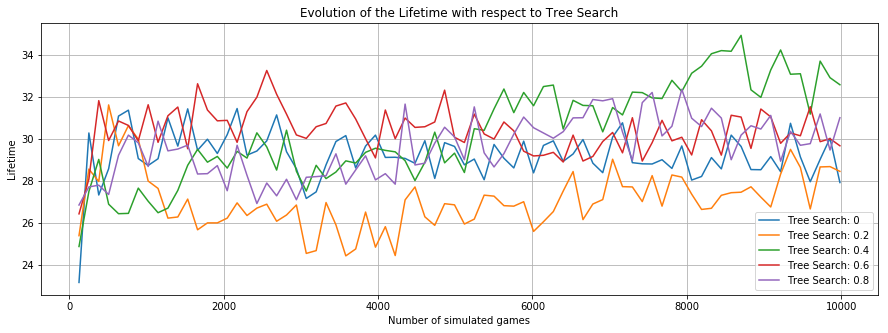

In [23]:
plt.figure(figsize=(15,5))
plt.title('Evolution of the Lifetime with respect to {}'.format(parameter_name))
for index, parameter in enumerate(parameter_range):
    x_values = [(i+1)*batch_size for i in range(int(total_games/batch_size))]
    plt.plot(x_values, overall_avg_lifetime[index], label=parameter_name + ': {}'.format(parameter))
plt.ylabel('Lifetime')
plt.xlabel('Number of simulated games')
plt.grid()
plt.legend()
plt.savefig('results/corner_init/{}.png'.format(parameter_name))
plt.show()

##  1.6 Tree Search:

In [5]:
parameter_name = 'Tree Search Multiple Runs'

In [6]:
total_games = 10000

In [ ]:
overall_avg_lifetime = []
overall_cost = []
overall_computational_time = []

parameter_range = [0, 0.1, 0.3, 0.5, 0.7, 0.9, 1]

batch_size = 128
n_iter = int(total_games/batch_size)

for parameter in parameter_range:
    
    distributions = np.empty((0, n_iter))
    
    for repeat in range(6):
    
        grid_size = 10
        simulation = BioCells(random_corner_init=True)
        n_input = grid_size**2
        model = FullyConnected(n_input=n_input, n_hidden=200, n_classes=4)

        start_time = time.time()
        avg_lifetime, avg_reward, computation_time = train(model, simulation,
                                                           batch_size=batch_size,
                                                           n_iterations=int(n_iter),
                                                           gamma=0.9,
                                                           learning_rate=0.001,
                                                           grid_size=10,
                                                           tree_search=True,
                                                           ts_prop=parameter)
        
        distributions = np.vstack((distributions, avg_lifetime))
    
    overall_avg_lifetime.append(distributions)

print('Done...')

Start training...
Creating FullyConnected model


Lifetime: 29.046875: 100%|██████████| 78/78 [12:28<00:00,  9.60s/it] 


Saving model to tensorflow_model/weights/weights_FullyConnected.p
Start training...
Creating FullyConnected model


Lifetime: 28.8984375: 100%|██████████| 78/78 [10:28<00:00,  8.06s/it]


Saving model to tensorflow_model/weights/weights_FullyConnected.p
Start training...
Creating FullyConnected model


Lifetime: 29.2109375: 100%|██████████| 78/78 [10:37<00:00,  8.17s/it]


Saving model to tensorflow_model/weights/weights_FullyConnected.p
Start training...
Creating FullyConnected model


Lifetime: 30.578125: 100%|██████████| 78/78 [10:34<00:00,  8.14s/it] 


Saving model to tensorflow_model/weights/weights_FullyConnected.p
Start training...
Creating FullyConnected model


Lifetime: 32.1796875: 100%|██████████| 78/78 [10:57<00:00,  8.43s/it]


Saving model to tensorflow_model/weights/weights_FullyConnected.p
Start training...
Creating FullyConnected model


Lifetime: 30.3046875: 100%|██████████| 78/78 [10:36<00:00,  8.16s/it]


Saving model to tensorflow_model/weights/weights_FullyConnected.p
Start training...
Creating FullyConnected model


Lifetime: 28.671875: 100%|██████████| 78/78 [10:42<00:00,  8.24s/it] 


Saving model to tensorflow_model/weights/weights_FullyConnected.p
Start training...
Creating FullyConnected model


Lifetime: 29.7421875: 100%|██████████| 78/78 [11:00<00:00,  8.46s/it]


Saving model to tensorflow_model/weights/weights_FullyConnected.p
Start training...
Creating FullyConnected model


Lifetime: 30.6875: 100%|██████████| 78/78 [11:22<00:00,  8.75s/it]   


Saving model to tensorflow_model/weights/weights_FullyConnected.p
Start training...
Creating FullyConnected model


Lifetime: 30.0: 100%|██████████| 78/78 [10:43<00:00,  8.26s/it]      


Saving model to tensorflow_model/weights/weights_FullyConnected.p
Start training...
Creating FullyConnected model


Lifetime: 32.203125: 100%|██████████| 78/78 [11:09<00:00,  8.59s/it] 


Saving model to tensorflow_model/weights/weights_FullyConnected.p
Start training...
Creating FullyConnected model


Lifetime: 30.828125: 100%|██████████| 78/78 [10:49<00:00,  8.33s/it] 


Saving model to tensorflow_model/weights/weights_FullyConnected.p
Start training...
Creating FullyConnected model


Lifetime: 29.8515625: 100%|██████████| 78/78 [11:37<00:00,  8.94s/it]


Saving model to tensorflow_model/weights/weights_FullyConnected.p
Start training...
Creating FullyConnected model


Lifetime: 30.1484375: 100%|██████████| 78/78 [11:34<00:00,  8.90s/it]


Saving model to tensorflow_model/weights/weights_FullyConnected.p
Start training...
Creating FullyConnected model


Lifetime: 30.453125: 100%|██████████| 78/78 [11:31<00:00,  8.87s/it] 


Saving model to tensorflow_model/weights/weights_FullyConnected.p
Start training...
Creating FullyConnected model


Lifetime: 29.8984375: 100%|██████████| 78/78 [11:37<00:00,  8.94s/it]


Saving model to tensorflow_model/weights/weights_FullyConnected.p
Start training...
Creating FullyConnected model


Lifetime: 30.2109375: 100%|██████████| 78/78 [11:27<00:00,  8.81s/it]


Saving model to tensorflow_model/weights/weights_FullyConnected.p
Start training...
Creating FullyConnected model


Lifetime: 30.6484375: 100%|██████████| 78/78 [12:01<00:00,  9.26s/it]


Saving model to tensorflow_model/weights/weights_FullyConnected.p
Start training...
Creating FullyConnected model


Lifetime: 30.9296875: 100%|██████████| 78/78 [12:46<00:00,  9.83s/it]


Saving model to tensorflow_model/weights/weights_FullyConnected.p
Start training...
Creating FullyConnected model


Lifetime: 30.8203125: 100%|██████████| 78/78 [12:43<00:00,  9.78s/it]


Saving model to tensorflow_model/weights/weights_FullyConnected.p
Start training...
Creating FullyConnected model


Lifetime: 31.71875: 100%|██████████| 78/78 [12:35<00:00,  9.69s/it]  


Saving model to tensorflow_model/weights/weights_FullyConnected.p
Start training...
Creating FullyConnected model


Lifetime: 31.1875: 100%|██████████| 78/78 [12:43<00:00,  9.79s/it]   


Saving model to tensorflow_model/weights/weights_FullyConnected.p
Start training...
Creating FullyConnected model


Lifetime: 31.78125: 100%|██████████| 78/78 [12:17<00:00,  9.45s/it]  


Saving model to tensorflow_model/weights/weights_FullyConnected.p
Start training...
Creating FullyConnected model


Lifetime: 31.203125: 100%|██████████| 78/78 [12:33<00:00,  9.67s/it] 


Saving model to tensorflow_model/weights/weights_FullyConnected.p
Start training...
Creating FullyConnected model


Lifetime: 32.0234375: 100%|██████████| 78/78 [13:30<00:00, 10.39s/it]


Saving model to tensorflow_model/weights/weights_FullyConnected.p
Start training...
Creating FullyConnected model


Lifetime: 30.5703125: 100%|██████████| 78/78 [13:03<00:00, 10.05s/it]


Saving model to tensorflow_model/weights/weights_FullyConnected.p
Start training...
Creating FullyConnected model


Lifetime: 32.640625: 100%|██████████| 78/78 [13:19<00:00, 10.25s/it] 


Saving model to tensorflow_model/weights/weights_FullyConnected.p
Start training...
Creating FullyConnected model


Lifetime: 30.2578125: 100%|██████████| 78/78 [12:51<00:00,  9.89s/it]


Saving model to tensorflow_model/weights/weights_FullyConnected.p
Start training...
Creating FullyConnected model


Lifetime: 32.3046875: 100%|██████████| 78/78 [13:04<00:00, 10.06s/it]


Saving model to tensorflow_model/weights/weights_FullyConnected.p
Start training...
Creating FullyConnected model


Lifetime: 34.3203125: 100%|██████████| 78/78 [13:15<00:00, 10.20s/it]


Saving model to tensorflow_model/weights/weights_FullyConnected.p
Start training...
Creating FullyConnected model


Lifetime: 32.8046875: 100%|██████████| 78/78 [14:11<00:00, 10.91s/it]


Saving model to tensorflow_model/weights/weights_FullyConnected.p
Start training...
Creating FullyConnected model


Lifetime: 32.3359375: 100%|██████████| 78/78 [14:13<00:00, 10.94s/it]


Saving model to tensorflow_model/weights/weights_FullyConnected.p
Start training...
Creating FullyConnected model


Lifetime: 32.328125: 100%|██████████| 78/78 [13:54<00:00, 10.70s/it] 


Saving model to tensorflow_model/weights/weights_FullyConnected.p
Start training...
Creating FullyConnected model


Lifetime: 35.21875: 100%|██████████| 78/78 [13:54<00:00, 10.69s/it]  


Saving model to tensorflow_model/weights/weights_FullyConnected.p
Start training...
Creating FullyConnected model


Lifetime: 30.3203125: 100%|██████████| 78/78 [13:33<00:00, 10.43s/it]


Saving model to tensorflow_model/weights/weights_FullyConnected.p
Start training...
Creating FullyConnected model


Lifetime: 32.453125: 100%|██████████| 78/78 [13:52<00:00, 10.68s/it] 


Saving model to tensorflow_model/weights/weights_FullyConnected.p
Start training...
Creating FullyConnected model


Lifetime: 33.21875: 100%|██████████| 78/78 [14:23<00:00, 11.07s/it]  


Saving model to tensorflow_model/weights/weights_FullyConnected.p
Start training...
Creating FullyConnected model


Lifetime: 35.0234375: 100%|██████████| 78/78 [14:29<00:00, 11.15s/it]


Saving model to tensorflow_model/weights/weights_FullyConnected.p
Start training...
Creating FullyConnected model


Lifetime: 32.9375: 100%|██████████| 78/78 [14:11<00:00, 10.92s/it]   


Saving model to tensorflow_model/weights/weights_FullyConnected.p
Start training...
Creating FullyConnected model


Lifetime: 31.3046875:  63%|██████▎   | 49/78 [08:44<05:10, 10.70s/it]

In [ ]:
plt.figure(figsize=(15,5))
plt.title('Evolution of the Lifetime with respect to {}'.format(parameter_name))
for index, parameter in enumerate(parameter_range):
    plt.boxplot(overall_avg_lifetime[index], widths=0.05)
    plt.plot(range(1, n_iter+1), np.mean(overall_avg_lifetime[index], axis=0), label='{}: {}'.format(parameter_name, parameter))
plt.ylabel('Lifetime')
plt.xlabel('Number of simulated games')
plt.grid()
plt.legend()
plt.savefig('results/corner_init/{}.png'.format(parameter_name))
plt.show()